In [6]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
def gen(arr,step,n):
    res=[]
    for i in arr:
        res.append([x for x in [i+j*step for j in range(-n,n+1)]])
    return res

arr = [1,1,1,1,1,1,1,1,1]
ret = (gen(arr, 0.01,2))
y = []
for i in range(5):
    x = []
    for j in range(9):
        x.append(float("{:.2f}".format(ret[j][i])))
    y.append(x)

for x in y:
    print(x, end=',\n')


[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98],
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01],
[1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02],


In [11]:

x_train = [
    
[0.74, 0.96, 0.82, 0.98, 0.89, 0.95, 0.95, 0.92, 0.95],
[0.69, 0.98, 0.85, 1.00, 0.91, 0.96, 0.92, 0.52, 0.97],
[0.70, 0.98, 0.86, 1.00, 0.92, 0.96, 0.64, 0.39, 0.98],
[0.79, 0.98, 0.87, 1.00, 0.91, 0.96, 0.44, 0.47, 0.98],
[0.82, 0.99, 0.86, 1.00, 0.91, 0.96, 0.36, 0.00, 0.98],
[0.84, 0.99, 0.86, 1.00, 0.90, 0.96, 0.30, 0.00, 0.98],
[0.84, 0.99, 0.86, 1.00, 0.90, 0.96, 0.29, 0.00, 0.98],
[0.84, 0.99, 0.86, 1.00, 0.90, 0.96, 0.29, 0.00, 0.98],
[0.84, 0.99, 0.86, 1.00, 0.90, 0.96, 0.29, 0.00, 0.98],
[0.84, 0.98, 0.86, 1.00, 0.90, 0.96, 0.29, 0.00, 0.98],
[1.00, 0.93, 0.63, 1.00, 0.72, 0.92, 0.02, 0.96, 0.98],
[1.00, 0.89, 0.62, 1.00, 0.72, 0.88, 0.08, 0.98, 0.98],
[1.00, 0.89, 0.62, 1.00, 0.73, 0.89, 0.67, 0.98, 0.98],
[1.00, 0.88, 0.62, 1.00, 0.72, 0.88, 0.88, 0.98, 0.98],
[1.00, 0.89, 0.62, 1.00, 0.68, 0.85, 0.69, 0.99, 0.98],
[1.00, 0.92, 0.65, 1.00, 0.66, 0.92, 0.26, 0.98, 0.98],
[1.00, 0.93, 0.66, 1.00, 0.66, 0.96, 0.17, 0.98, 0.98],
[1.00, 0.93, 0.67, 1.00, 0.66, 0.96, 0.16, 0.98, 0.97],
[1.00, 0.93, 0.67, 1.00, 0.66, 0.96, 0.14, 0.98, 0.97],
[1.00, 0.94, 0.67, 1.00, 0.66, 0.96, 0.14, 0.98, 0.98],


    
[0.72, 0.84, 0.79, 0.96, 1.00, 0.92, 0.92, 0.70, 0.95],
[0.70, 0.84, 0.79, 0.95, 1.00, 0.92, 0.92, 0.73, 0.94],
[0.72, 0.85, 0.81, 0.97, 1.00, 0.92, 0.92, 0.76, 0.95],
[0.72, 0.86, 0.81, 0.97, 0.95, 0.92, 0.92, 0.70, 0.95],
[0.87, 0.86, 0.77, 0.97, 0.80, 0.93, 0.92, 0.85, 0.97],
[0.94, 0.84, 0.65, 1.00, 0.77, 0.93, 0.00, 0.73, 1.00],
[0.93, 0.80, 0.56, 1.00, 0.72, 0.92, 0.00, 0.54, 0.95],
[0.95, 0.80, 0.55, 1.00, 0.68, 0.92, 0.00, 0.53, 0.95],
[0.93, 0.79, 0.54, 1.00, 0.70, 0.92, 0.00, 0.60, 0.95],
[0.95, 0.79, 0.57, 0.98, 0.79, 0.92, 0.00, 0.62, 0.95],
[0.88, 0.78, 0.60, 0.97, 0.93, 0.93, 0.04, 0.63, 0.96],
[0.90, 0.86, 0.71, 0.99, 1.00, 0.92, 0.92, 0.80, 0.96],
[0.73, 0.86, 0.79, 0.97, 0.88, 0.90, 0.90, 0.79, 0.93],
[0.66, 0.84, 0.79, 0.96, 0.78, 0.91, 0.92, 0.52, 0.92],
[0.61, 0.83, 0.77, 0.95, 0.72, 0.90, 0.92, 0.67, 0.92],
[0.60, 0.84, 0.78, 0.95, 0.72, 0.91, 0.92, 0.80, 0.91],
[0.61, 0.84, 0.80, 0.96, 0.72, 0.91, 0.91, 0.70, 0.92],
[0.60, 0.84, 0.80, 0.96, 0.72, 0.91, 0.91, 0.50, 0.93],
[0.59, 0.83, 0.79, 0.95, 0.72, 0.91, 0.92, 0.71, 0.94],
[0.57, 0.83, 0.79, 0.95, 0.73, 0.91, 0.92, 0.71, 0.94],



    
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.43, 0.63, 0.28, 0.79, 0.61, 0.94, 0.95, 0.00, 0.91],
[0.44, 0.62, 0.26, 0.80, 0.61, 0.95, 0.95, 0.00, 0.92],
[0.44, 0.55, 0.10, 0.83, 0.62, 0.96, 0.94, 0.00, 0.96],
[0.40, 0.52, 0.00, 0.83, 0.60, 0.95, 0.75, 0.00, 0.96],

[0.00, 0.14, 0.00, 1.00, 0.54, 0.23, 0.18, 0.08, 0.99],
[0.02, 0.12, 0.00, 1.00, 0.50, 0.25, 0.17, 0.00, 0.98],
[0.02, 0.11, 0.00, 1.00, 0.50, 0.26, 0.17, 0.00, 0.99],
[0.02, 0.11, 0.00, 1.00, 0.50, 0.26, 0.16, 0.07, 0.98],
[0.02, 0.11, 0.00, 1.00, 0.50, 0.27, 0.16, 0.07, 0.98],
[0.03, 0.11, 0.00, 1.00, 0.51, 0.26, 0.16, 0.07, 0.98],
[0.03, 0.11, 0.00, 1.00, 0.51, 0.26, 0.16, 0.06, 0.98],
[0.03, 0.11, 0.00, 1.00, 0.51, 0.26, 0.16, 0.06, 0.98],
[0.02, 0.11, 0.00, 1.00, 0.51, 0.25, 0.16, 0.06, 0.98],
[0.02, 0.11, 0.00, 1.00, 0.51, 0.25, 0.16, 0.06, 0.98],

[0.59, 0.83, 0.66, 0.94, 1.00, 0.54, 0.57, 0.74, 0.41],
[0.59, 0.83, 0.66, 0.94, 1.00, 0.53, 0.56, 0.74, 0.41],
[0.59, 0.83, 0.66, 0.94, 1.00, 0.53, 0.56, 0.74, 0.42],
[0.60, 0.83, 0.66, 0.94, 1.00, 0.50, 0.52, 0.75, 0.40],
[0.60, 0.83, 0.62, 0.95, 1.00, 0.47, 0.46, 0.68, 0.33],
[0.62, 0.84, 0.63, 0.99, 1.00, 0.46, 0.43, 0.66, 0.33],
[0.62, 0.84, 0.64, 1.00, 1.00, 0.46, 0.41, 0.65, 0.32],
[0.62, 0.84, 0.64, 1.00, 1.00, 0.47, 0.40, 0.65, 0.31],
[0.62, 0.84, 0.63, 1.00, 1.00, 0.48, 0.42, 0.63, 0.32],
[0.62, 0.84, 0.62, 0.99, 1.00, 0.48, 0.42, 0.61, 0.31],

[1.00, 0.80, 0.00, 0.61, 0.66, 0.97, 0.40, 0.00, 0.10],
[1.00, 0.78, 0.00, 0.60, 0.64, 0.97, 0.07, 0.00, 0.21],
[1.00, 0.74, 0.00, 0.60, 0.63, 0.97, 0.00, 0.00, 0.13],
[1.00, 0.70, 0.00, 0.60, 0.63, 0.97, 0.00, 0.00, 0.12],
[1.00, 0.68, 0.00, 0.61, 0.63, 0.97, 0.00, 0.00, 0.09],
[1.00, 0.68, 0.00, 0.61, 0.63, 0.97, 0.00, 0.00, 0.10],
[1.00, 0.68, 0.00, 0.61, 0.63, 0.97, 0.00, 0.02, 0.10],
[1.00, 0.68, 0.00, 0.61, 0.63, 0.97, 0.00, 0.03, 0.10],
[1.00, 0.69, 0.00, 0.61, 0.63, 0.97, 0.00, 0.02, 0.08],
[1.00, 0.69, 0.00, 0.61, 0.63, 0.97, 0.00, 0.02, 0.06],

[0.71, 0.96, 0.00, 0.98, 0.92, 0.93, 0.94, 0.47, 0.96],
[0.64, 0.97, 0.00, 0.99, 0.90, 0.95, 0.49, 0.38, 0.96],
[1.00, 0.98, 0.00, 1.00, 0.90, 0.95, 0.10, 0.33, 0.97],
[1.00, 0.98, 0.00, 1.00, 0.91, 0.95, 0.00, 0.34, 0.97],
[1.00, 0.98, 0.00, 1.00, 0.91, 0.95, 0.00, 0.33, 0.97],
[1.00, 0.98, 0.00, 1.00, 0.91, 0.96, 0.00, 0.33, 0.97],
[1.00, 0.97, 0.00, 1.00, 0.91, 0.95, 0.00, 0.33, 0.97],
[1.00, 0.98, 0.00, 1.00, 0.92, 0.95, 0.00, 0.26, 0.97],
[1.00, 0.98, 0.00, 1.00, 0.92, 0.95, 0.00, 0.58, 0.97],
[0.77, 0.98, 0.00, 1.00, 0.93, 0.95, 0.00, 0.89, 0.97],

[0.52, 0.96, 0.76, 1.00, 0.95, 0.90, 0.88, 0.86, 0.98],
[0.52, 0.97, 0.64, 1.00, 0.94, 0.90, 0.85, 0.83, 0.98],
[0.40, 0.98, 0.00, 1.00, 0.92, 0.89, 0.43, 0.51, 0.97],
[0.00, 0.98, 0.00, 1.00, 0.91, 0.89, 0.06, 0.37, 0.98],
[0.00, 0.98, 0.00, 1.00, 0.90, 0.87, 0.00, 0.31, 0.98],
[0.02, 0.98, 0.00, 1.00, 0.90, 0.86, 0.00, 0.30, 0.98],
[0.01, 0.98, 0.00, 1.00, 0.90, 0.88, 0.00, 0.28, 0.98],
[0.01, 0.98, 0.00, 1.00, 0.91, 0.89, 0.00, 0.32, 0.97],
[0.00, 0.98, 0.00, 1.00, 0.91, 0.91, 0.00, 0.32, 0.98],
[0.00, 0.98, 0.00, 1.00, 0.92, 0.90, 0.00, 0.33, 0.98],


]

y_train = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],

    
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],

    
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],

    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],

    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],

    
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],

    
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],

    
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],

]

x_train = np.array(x_train, dtype = np.float32)
y_train = np.array(y_train)

In [12]:
model = Sequential()

IN = x_train.shape[1]

HIDDEN = IN + 10
OUT = y_train.shape[1]


model.add(Dense(units=HIDDEN, activation='relu', input_dim=IN))
model.add(Dense(units=OUT, activation='linear'))

model.compile(loss = 'mean_squared_error', optimizer=optimizers.SGD(lr=0.4))

In [13]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

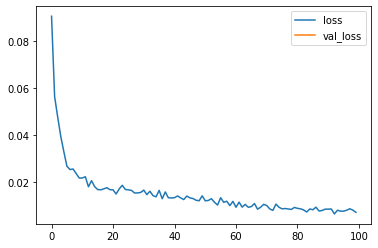

In [14]:
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=False, callbacks=[plot_losses])

In [15]:
predictions = model.predict(x_train).tolist()
for i, prediction in enumerate(predictions):
    print('model:\t', np.round(prediction,3))
    print('label:\t', y_train[i])
    print(' ')

4/4 [==============================] - 0s 1ms/step
model:	 [ 0.001 -0.003 -0.002  0.    -0.003 -0.002  0.179 -0.034  0.606]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.003 -0.007 -0.005  0.001 -0.009 -0.006 -0.037 -0.016  0.298]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.001 -0.001 -0.    -0.001 -0.001  0.016 -0.007  0.113]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.001  0.001  0.    -0.     0.002  0.001 -0.008 -0.151  0.27 ]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.    -0.    -0.001 -0.     0.001  0.     0.051 -0.084 -0.136]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.    -0.    -0.    -0.     0.001  0.001  0.041 -0.11  -0.106]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.001  0.    -0.    -0.     0.001  0.001  0.042 -0.11  -0.102]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.001  0.    -0.    -0.     0.001  0.001  0.042 -0.11  -0.102]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.001  0.    -0.    -0.     0.001  0.001  0.042 -0.11  -0.102]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0.001  0.001

In [16]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [17]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in arduino code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print('// You also have to disable the initial weight randomization')
print('// you can find it under this section in the arduino code:')
print('//* Initialize HiddenWeights and ChangeHiddenWeights ')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in arduino code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


// You also have to disable the initial weight randomization
// you can find it under this section in the arduino code:
//* Initialize HiddenWeights and ChangeHiddenWeights 


float HiddenWeights[10][19] = {{0.867354691028595, -0.32981008291244507, -2.4339776039123535, -0.4435385465621948, -0.05364520102739334, 0.3469122350215912, 0.40867874026298523, -0.19655144214630127, 0.054717548191547394, -0.12462185323238373, -0.052569806575775146, 0.46052291989326477, -0.02392583340406418, -0.047856587916612625, -0.7077482342720032, 1.0940196514129639, 0.37290698289871216, 0.21101106703281403, 0.7685304284095764}, {-1.4735242128372192, -0.13107451796531677, -0.10802605003118515, -0.035844236612319946, 0.41087451577186584, 0.038754887878894806, -0.03290892392396927, 0.33729225397109985, -0.7186048626899719, 0.65359997749